# Visualizing dataset of the college majors

In this mini project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. When we want to explore a new dataset by quickly creating visualizations, using tools like pyplot and matplotlib directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The dataset was uploaded by FiveThirtyEight on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). Originally, this data set could be found at the American Community Survey, which conducts surveys and aggregates the data.

Each row in the dataset represents a different major in college and contains some information about graduated students, their major and more:

* Rank - Rank by median earnings
* Major_code - Major code, FO1DP in ACS PUMS
* Major - Major description
* Major_category - Category of major from Carnevale et al
* Total - Total number of people with major
* Sample_size - Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
* Men - Male graduates
* Women - Female graduates
* ShareWomen - Women as share of total
* Employed - Number employed (ESR == 1 or 2)
* Full_time - Employed 35 hours or more
* Part_time - Employed less than 35 hours
* Full_time_year_round - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
* Unemployed - Number unemployed (ESR == 3)
* Unemployment_rate - Unemployed / (Unemployed + Employed)
* Median - Median earnings of full-time, year-round workers
* P25th - 25th percentile of earnigns
* P75th - 75th percentile of earnings
* College_jobs - Number with job requiring a college degree
* Non_college_jobs - Number with job not requiring a college degree
* Low_wage_jobs - Number in low-wage service jobs

For this dataset we will try to answer on some questions using different kind of plots.

* Do students in more popular majors make more money? Do male make more money on average?
     * Using scatter plots
* See distribution of the women and men in the majors, determine the most common range of the median salary and unemplyment rate
     * Using histograms
* look at share of women in top high and low paid jobs
     * Using bar plots
     
and more.

## Preparing data

Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

___
Top 5 most paid majors:

In [48]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.879436
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.898148
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.846963
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,0.892687
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.658369


Top 5 low paid majors:

In [49]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,3602,304,0.046320,26000,20000,39000,2771,2947,743,0.362707
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,1211,148,0.065112,25000,24000,34000,1488,615,82,0.182901
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,0.200141
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,2738,214,0.053621,23400,19200,26000,2403,1245,308,0.201254
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,410,87,0.104946,22000,20000,22000,288,338,192,0.122040


In [117]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We can notice some interesting facts for us from this description, that the quantity of graduated students is 393,735. Quantity of women is more than men, some majors have a share of the women almost 1. The quantity of unemployed students is 28,169 that constitutes almost 7% of the total. 

Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors. We must drop missing values

In [7]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [9]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

Only one row contained missing values and was dropped

## Plotting in Pandas

We will Generate scatter plots using `DataFrame.plot()` method in separate jupyter notebook cells to explore the following relations:

* Total and Median
* Total and Unemployment_rate
* Full_time and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

Our gold is to explore dataset and answer following questions using scatter plots:

* Do students in more popular majors make more money?

* Do students that majored in subjects that were majority female make more money?

* Is there any link between the number of full-time employees and median salary?

I will use a different style of graphics. In my opinion, it's the best decision when you need to explore data relatively quickly and not to use not so well and nice standard plots

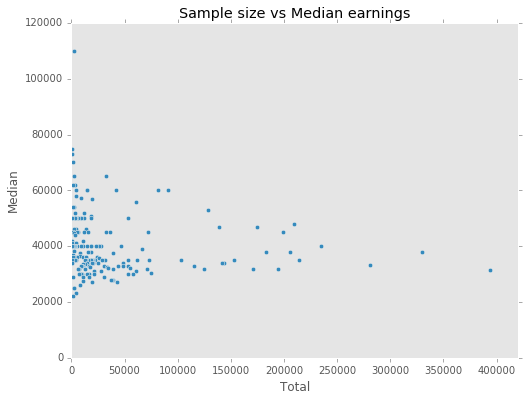

In [45]:
plt.style.use('ggplot')
recent_grads.plot(x = 'Total', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Sample size vs Median earnings',
                  figsize = (8,6),
                  xlim = [0,420000],
                 ylim = [0,120000],
                 grid = False,
                 fontsize = 10,
                 s = 20)

It's not so clear from the scale of this graphic what's going on in range between `0 - 50000` total graduated people. Let's look closer on it adjusting `lim` parameter

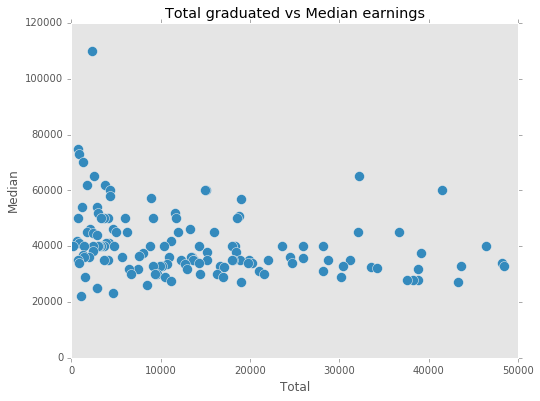

In [47]:
recent_grads.plot(x = 'Total', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Total graduated vs Median earnings',
                  figsize = (8,6),
                  xlim = [0,50000],
                 ylim = [0,120000],
                 grid = False,
                 fontsize = 10,
                 s = 100)

So, we see there is no difference between the average salary and popularity of the major. There is no clear reliance between these two variables in general, but we see that the first top-5 most paid major in range `0-1000`, so it's not popular and rare majors. On the other hand, most low-wage jobs are also in that range.

Let's look at the link between the total number of people with major and unemployment rate.

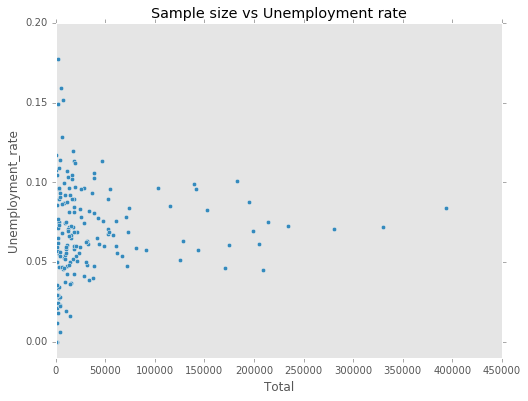

In [50]:
recent_grads.plot(x = 'Total', 
                  y = 'Unemployment_rate', 
                  kind = 'scatter', 
                  title = 'Sample size vs Unemployment rate',
                  figsize = (8,6),
                 xlim = [0,450000],
                 ylim = [-0.01,0.2],
                 grid = False,
                 fontsize = 10)

Let's look closer at the most chaotic range (0-30,000) :

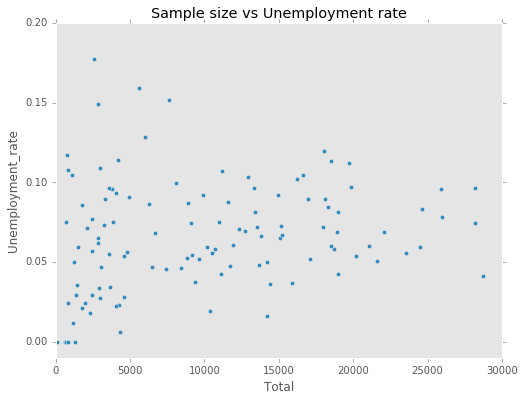

In [53]:
recent_grads.plot(x = 'Total', 
                  y = 'Unemployment_rate', 
                  kind = 'scatter', 
                  title = 'Sample size vs Unemployment rate',
                  figsize = (8,6),
                 xlim = [0,30000],
                 ylim = [-0.01,0.2],
                 grid = False,
                 fontsize = 10)

This is the same situation as with the median salary, there is no strong dependency between total graduated students and the unemployment rate. But we see that the most variance of the data concentrated in the `0-50,000` range, like at the former graphic.  

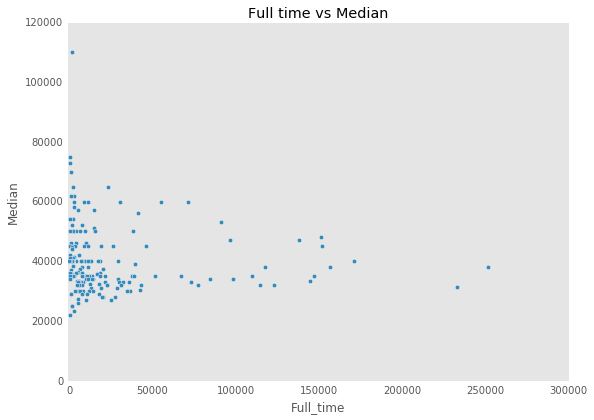

In [44]:
recent_grads.plot(x = 'Full_time', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Full time vs Median',
                  figsize = (8,6),
                ylim = [0,120000],
                  xlim = [-1000,300000],
                 grid = False,
                 fontsize = 10)

Next, consider the situation with women closer. First, let's look at the dependency between the share of the women and the unemployment rate. 

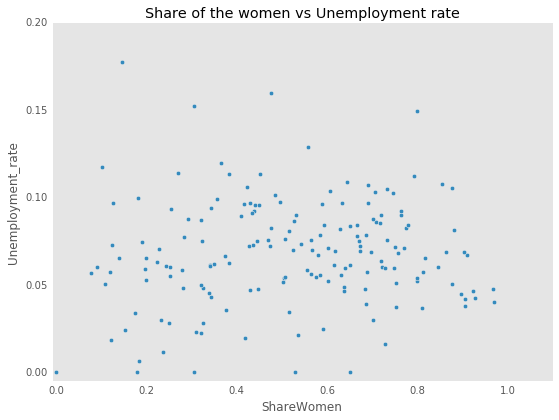

In [37]:
recent_grads.plot(x = 'ShareWomen', 
                  y = 'Unemployment_rate', 
                  kind = 'scatter', 
                  title = 'Share of the women vs Unemployment rate',
                  figsize = (8,6),
                  ylim = [-0.005,0.2],
                  xlim = [-0.01,1.1],
                 grid = False,
                 fontsize = 10)

We see that the share of women in majors isn't linked with the unemployment rate and spread chaotically. So, we may conclude, that the increase in the share of women in majors does not impact on the unemployment rate.

To answer the question if there is a link between average salary and quantity of women in majors, let's plot `ShareWomen` vs `Median` graphic:

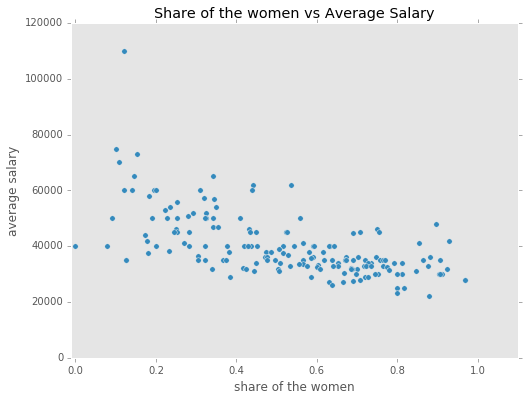

In [40]:
ax = recent_grads.plot(x = 'ShareWomen', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Share of the women vs Average Salary',
                  figsize = (8,6),
                  ylim = [0,120000],
                  xlim = [-0.01,1.1],
                 grid = False,
                 fontsize = 10,
                 s = 30)
ax.set_xlabel('share of the women')
ax.set_ylabel('average salary')

We see a slope and can say, that there is some negative correlation. Okay, now we may transform your data a little bit and look at the situation with majors where the majority are male. Logicaly, it'll be vice-versa

In [33]:
recent_grads['ShareMen'] = 1 - recent_grads['ShareWomen']

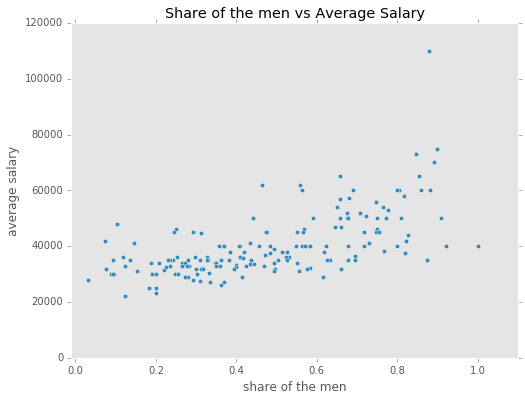

In [38]:
ax = recent_grads.plot(x = 'ShareMen', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Share of the men vs Average Salary',
                  figsize = (8,6),
                  ylim = [0,120000],
                  xlim = [-0.01,1.1],
                 grid = False,
                 fontsize = 10)
ax.set_xlabel('share of the men')
ax.set_ylabel('average salary')

So, we can say that students that majored in subjects that were majority female don't make more money. Overwise, male graduated students have a better salary. 

Looking at the next graphic we can notice that there is no link between the number of students with a full-time job and average salary. If we normalize column `Full_time` dividing by `Total` columns for each major we get the ratio of employed 35 hours or more. 

But anyway, there is still a weak positive correlation and we can't say that the level of median salary depends on the level of students who employed 35 hours or more after college

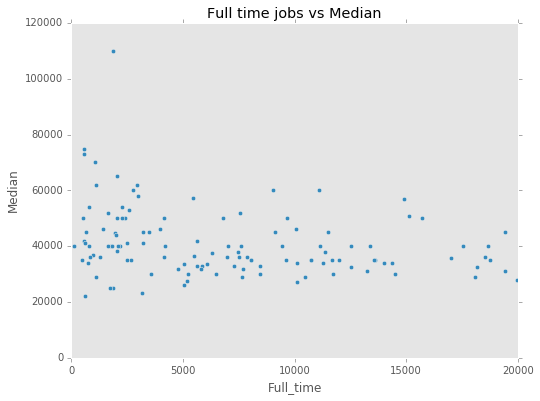

In [58]:
recent_grads.plot(x = 'Full_time', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Full time jobs vs Median',
                  figsize = (8,6),
                  xlim = [0,20000],
                   ylim = [0,120000],
                 grid = False,
                 fontsize = 10)

In [62]:
recent_grads['full_time_ratio'] = recent_grads['Full_time']/recent_grads['Total']
recent_grads['full_time_ratio'].head()

0    0.790509
1    0.735450
2    0.651869
3    0.849762
4    0.718227
Name: full_time_ratio, dtype: float64

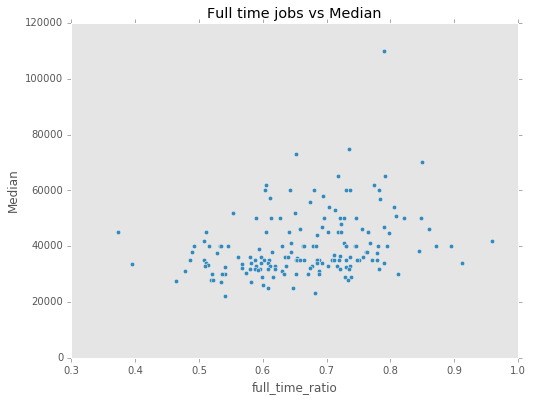

In [61]:
recent_grads.plot(x = 'full_time_ratio', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Full time jobs vs Median',
                  figsize = (8,6),
                   ylim = [0,120000],
                 grid = False,
                 fontsize = 10)

___
Also, there is no dependency between the overall number of men and women (between sex)  and average salary of the majors

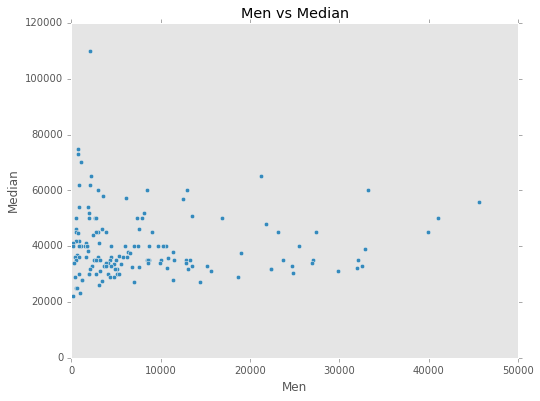

In [63]:
recent_grads.plot(x = 'Men', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Men vs Median',
                  figsize = (8,6),
                   ylim = [0,120000],
                  xlim = [0,50000],
                 grid = False,
                 fontsize = 10)

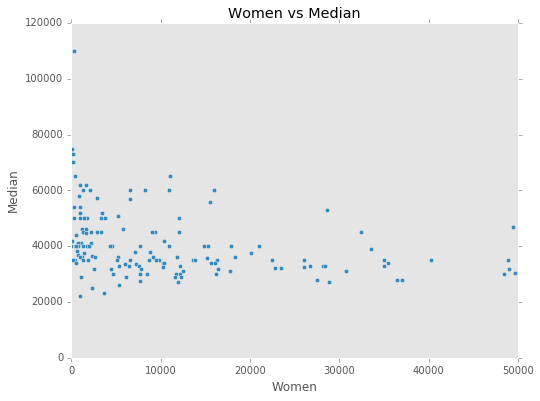

In [65]:
recent_grads.plot(x = 'Women', 
                  y = 'Median', 
                  kind = 'scatter', 
                  title = 'Women vs Median',
                  figsize = (8,6),
                   ylim = [0,120000],
                  xlim = [0,50000],
                 grid = False,
                 fontsize = 10)

## distributions

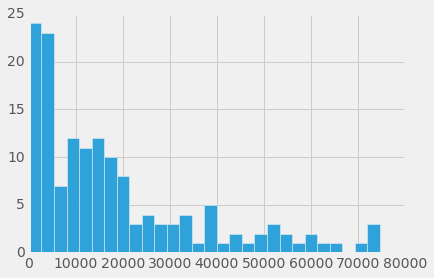

In [71]:
plt.style.use('fivethirtyeight')
recent_grads['Total'].hist(bins=30, range=(0,80000))

The most common range for total graduated students from one major is 0 - 10,000 and runner-up is 10,000 - 20,000

Let's look at the distribution of the median salary of the majors

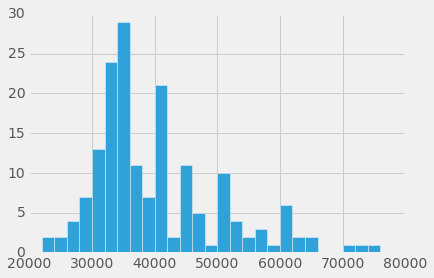

In [76]:
recent_grads['Median'].hist(bins=30, range = (20000,80000))

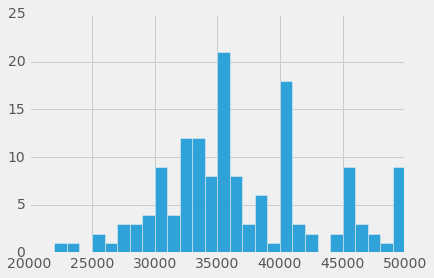

In [77]:
recent_grads['Median'].hist(bins=30, range = (20000,50000))

So, we see that the most frequent salary is about `35,000`. The most common range of the median salary is `30,000-40,000`

Better view on median of the data and its variance give box plot, let's build it

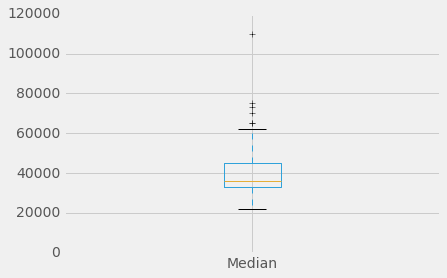

In [85]:
recent_grads['Median'].plot.box(ylim = (0,120000))

From this graphic, we can see the overall variance of the median salary, outliers and, of course, interquartile range, which gives us the main representation of how data is spread out.

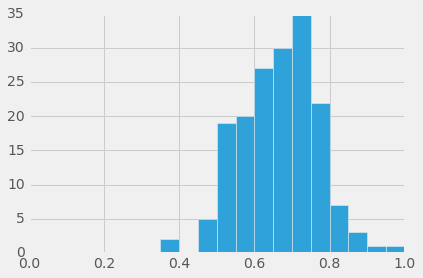

In [88]:
recent_grads['full_time_ratio'].hist(bins=20, range = (0, 1))

We can see, that the majority of the graduated students have full-time jobs of their majors relating to the total number

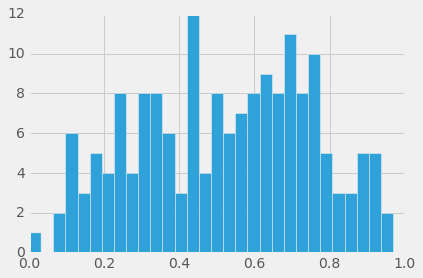

In [79]:
recent_grads['ShareWomen'].hist(bins=30)

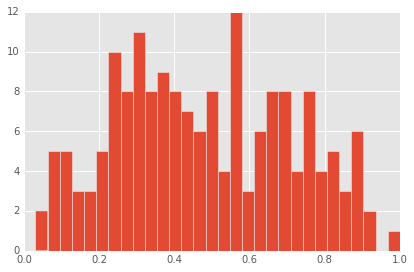

In [101]:
recent_grads['ShareMen'].hist(bins=30)

So, there is almost 50/50 distribution of the share of the women and men at the glance. We see little shift to the right for women in the middle, but, I guess, it's because of that the number of women is bigger than men on the whole.

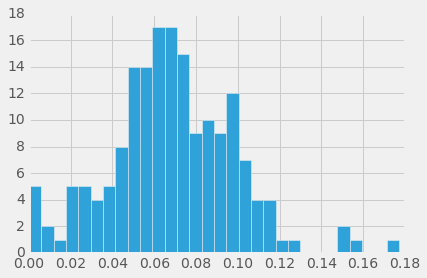

In [80]:
recent_grads['Unemployment_rate'].hist(bins=30)

The most common unemployment rate of the majors within the 4-8% range

Different representation of this using box plot

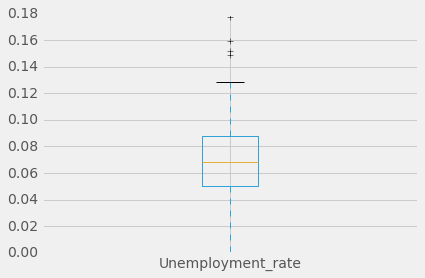

In [89]:
recent_grads['Unemployment_rate'].plot.box()

## Scatter matrix and bar plots

A good representation of the data to a quick look and estimating some issues is the scatter matrix. We could build all of the former graphics using this technique and look at the reliance between variables quickly to think over the following observation.

In [67]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff49a7df320>,
      dtype=object)

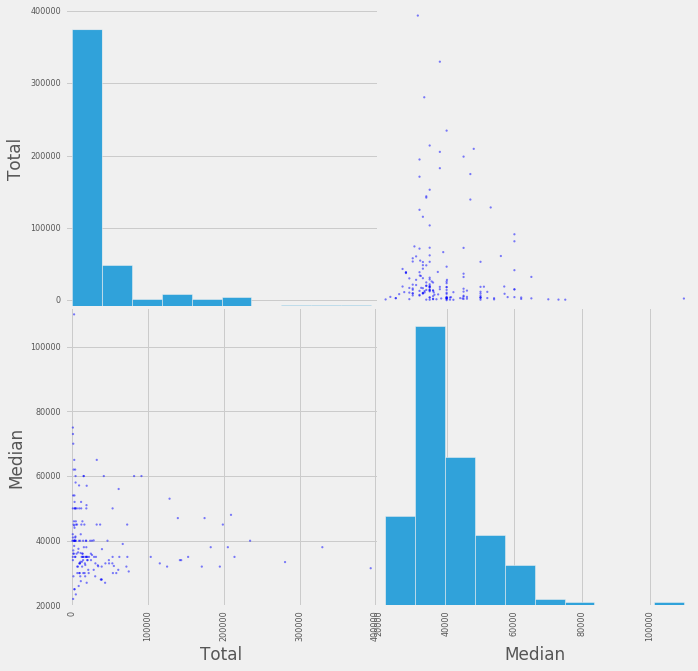

In [68]:
plt.style.use('fivethirtyeight') # set the beauty
scatter_matrix (recent_grads[['Total', 'Median']], alpha = 0.5, figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff49973a978>,
      dtype=object)

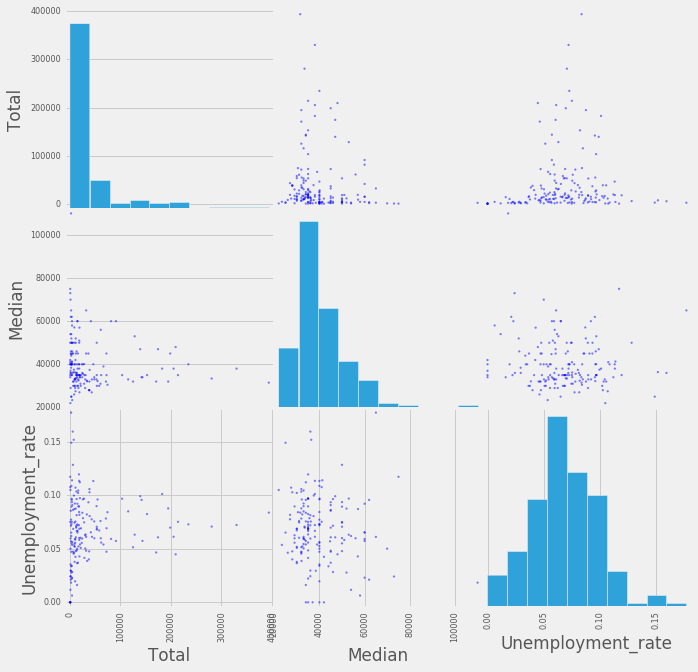

In [90]:
scatter_matrix (recent_grads[['Total', 'Median', 'Unemployment_rate']], figsize = (10,10))

From this matrix of plots, we could find out, that almost all of the total graduated students concentrated in `0 - 100,000`range over the majors. There is an absence of dependency between median and unemployment rate, the popularity of the major and its average salary. Also, we see that the unemployment rate has an almost normal distribution, the `median` is shifted to the left. Finally, we should look closer at the `0 - 100,000` range for further investigation.

___
Next, we may use **bar plots** to look at the numeric data by each major. When creating bar plots using pandas, we only need to specify the data we want the bars to represent and the labels for each bar. It's convenient when analyzing data.

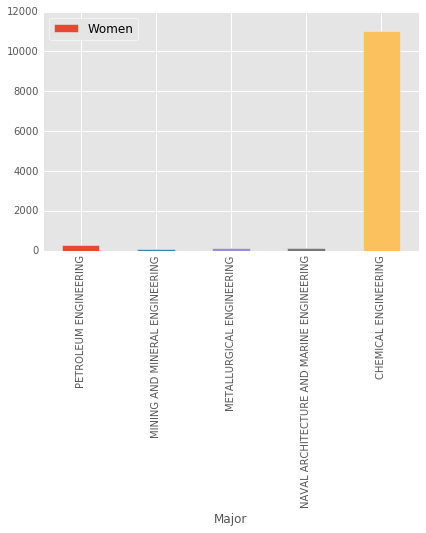

In [92]:
plt.style.use('ggplot')
ax = recent_grads[:5].plot.bar(x='Major', y='Women')

We're going to use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and the last ten rows of the `recent_grads` data frame. So, we will look at the share of the women at the most 5 paid jobs and the lowest-paid 5 job

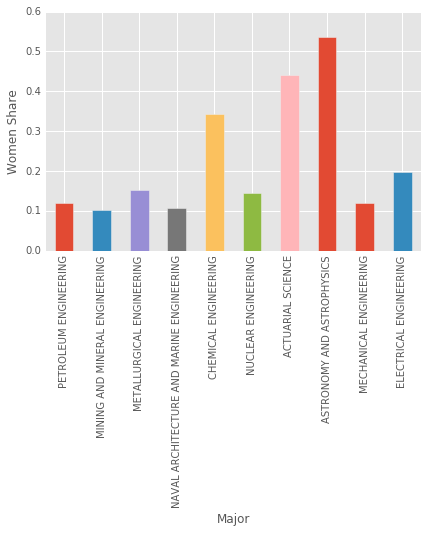

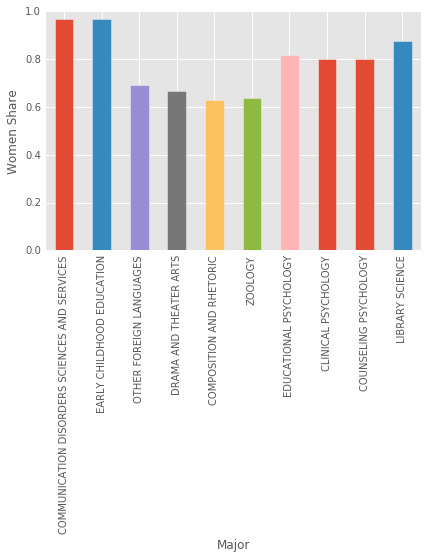

In [94]:
ax1 = recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
ax2 = recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)
ax1.set_ylabel('Women Share')
ax2.set_ylabel('Women Share')

We briefly see that share of the women in the low-paid majors in this dataset is rather higher than in high-paid jobs

Let's find out what rate of unemployment the high and low paid majors have

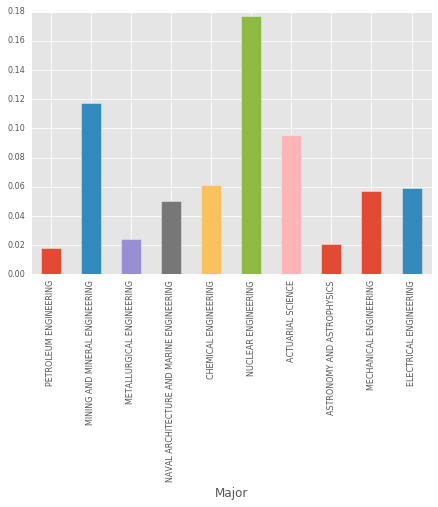

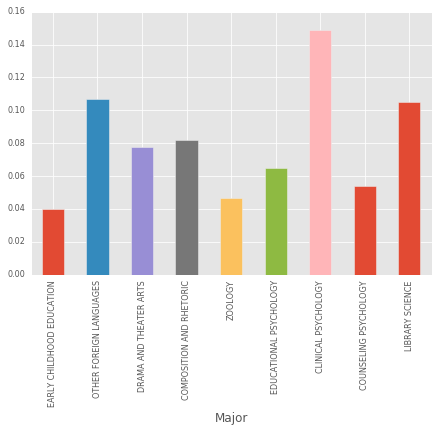

In [98]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

Nuclear engineering has the highest rate of unemployment, almost 18% (the highest among all dataset referring to the `recent_grads.describe()`). Next, `Petroleum engineering` and `astronomy and astrophysics` have the lowest rate of unemployment among the top high-paid majors. In the top lowest-paid majors the clinical psychology also has a fairly high rate (about 15%)

## Conclusion

This project aimed to show how we can analyze data sets using pandas plotting. It's a quick and simple representation of the data, after which we can find out interesting issues about the dataset. We've looked through the data, have got a representation of the variables, their dependency and have looked on overall distribution, understood main concepts and answered on the important and interesting questions using visualization through scatter plots, bar, box plots, matrix plots, and histograms. Each type of plots can help us to answer the particular part of the questions, combining different charts can give us a deep picture of the data.

We didn't adjust our graphics to look more accurate and didn't pursue to lead the rules of good visualization (like was represented in the works by Edward Tufte and Alberto Cairo), because the main aim is to show how quickly we can explore our data through pandas plotting without fine adjustment of the matplotlib library.